#### Import necessary libraries

In [25]:
import tensorflow as tf
from keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


#### Load Dataset

In [26]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

#### Vizualize Data

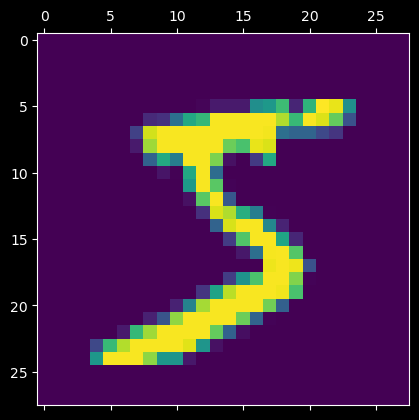

In [27]:
plt.matshow(X_train[0])

In [28]:
#Normalize Data (scaling the pixel values to a range of 0 to 1, 
#typically done by dividing each pixel value by 255.)
#Neural networks and many machine learning algorithms perform better or converge faster when the input features are scaled to a small range.

X_train = X_train / 255
X_test = X_test / 255

#### CNN for Classification

In [29]:
model = Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1648 - accuracy: 0.9512
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0569 - accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0374 - accuracy: 0.9883
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0244 - accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0175 - accuracy: 0.9944


In [31]:
y_train[:5] #The actual labels of the first five images in our training set

array([5, 0, 4, 1, 9], dtype=uint8)

In [32]:
model.evaluate(X_test,y_test)

#The loss value (0.047) indicates how well the model's predictions match the actual labels. 
# Lower values indicate better performance

#The accuracy value (0.984) represents the percentage of correct predictions the model made on the test set. 
# An accuracy of 0.9843 means the model correctly predicted the labels for approximately 98.4% of the test samples

313/313 [==============================] - 2s 5ms/step - loss: 0.0473 - accuracy: 0.9847


[0.04727470502257347, 0.9847000241279602]

#### Making Prediction

1/1 [==============================] - 0s 226ms/step


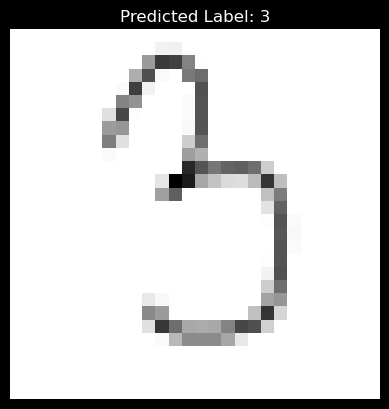

Predicted Label: 3


In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = 'image.png'  

# Loading the image using PIL (Python Imaging Library)
image = Image.open(image_path)

# Convert the image to grayscale and resize
image = image.convert('L')  
image = image.resize((28, 28))

# Convert the image to a numpy array and normalize its pixel values
image_array = np.asarray(image, dtype=np.float32)
image_array = image_array / 255.0

# Reshape the image to match the model's expected input shape
image_array = np.expand_dims(image_array, axis=0)
image_array = np.expand_dims(image_array, axis=-1)  # Add grayscale channel dimension

# Make predictions using our trained model
predictions = model.predict(image_array)
predicted_label = np.argmax(predictions)

# Display the image and predicted label using matplotlib
plt.imshow(image_array.squeeze(), cmap='gray')  
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

print(f'Predicted Label: {predicted_label}')


## HENCE WE OBSERVE OUR MODEL CORRECTLY PREDICTS THE GIVEN NUMBER
